<a href="https://colab.research.google.com/github/lletridung/baitapai/blob/main/newtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as  pd 
import numpy as np
import matplotlib as  plt 

# Create URL
url = '/content/drive/MyDrive/social_network_ads.csv'

# Read the data and see inside the data[5]:
dataframe = pd.read_csv(url)
dataframe.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
# Check for the size of the data
dataframe.shape

(400, 5)

In [10]:
# Check for NaN Data
dataframe.isnull().values.any()

False

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
# Check the "Gender" Data
dataframe['Gender'].describe()

count        400
unique         2
top       Female
freq         204
Name: Gender, dtype: object

In [13]:
# Change the value of gender from float to int
scale_mapper = {"Female":0,
                "Male":1,}

dataframe["Gender"]=dataframe["Gender"].replace(scale_mapper)
dataframe.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [14]:
# Check info of data again
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [15]:
# Remove the unnecessary column 'ID'
dataframe.drop("User ID",axis = 1, inplace = True)

In [16]:
# Save features and prediction
Features = ['Gender','Age','EstimatedSalary']
PredictClass = ['Purchased']

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

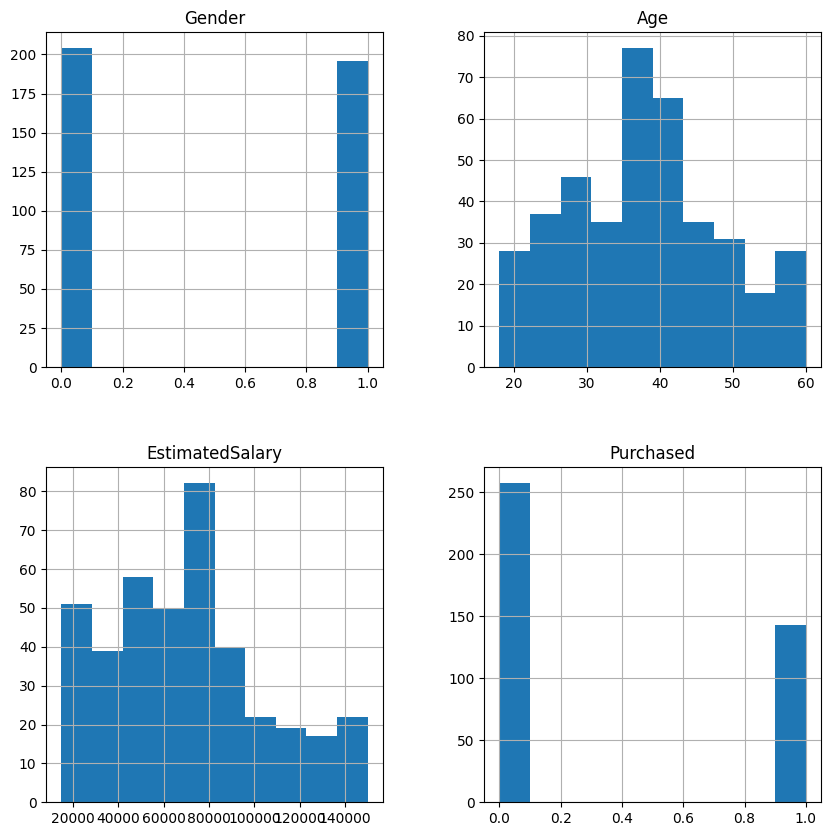

In [17]:
# Check for the imbalance appears in the data, or not
dataframe.hist(bins=10, figsize=(10,10))

**Decision Tree Classifier**

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size = 0.3, random_state=1) #Chia dữ liệu thành tập huấn luyện và tập kiểm tra. 
                                                                                            #Tập huấn luyện sẽ chứa 70% dữ liệu, và tập kiểm tra sẽ chứa 30% dữ liệu. 
                                                                                            #Tham số random_state được đặt là 1 để đảm bảo tính nhất quán của việc chia dữ liệu.

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()#Tạo một phiên bản của lớp DecisionTreeClassifier.

# Train the classifier on the training data
clf.fit(X_train, y_train) 

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy1 = accuracy_score(y_test, y_pred)
print(f"DecisionTreeClassifier Accuracy: {accuracy1*100}%")

DecisionTreeClassifier Accuracy: 81.66666666666667%


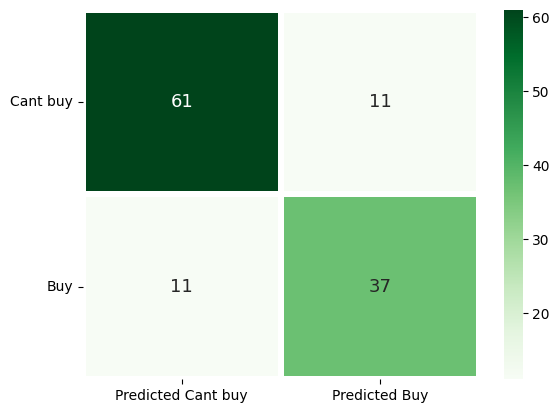

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 4,  annot_kws = {'fontsize': 13}, 
                yticklabels = ['Cant buy', 'Buy'], xticklabels = ['Predicted Cant buy', 'Predicted Buy'])
plt.yticks(rotation = 0)
plt.show()


**BernoulliNB**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
# Split the data into training and test sets
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

# Standardize the data
std_scaler = StandardScaler() #Tạo một phiên bản của lớp StandardScaler.
train_std = std_scaler.fit_transform(X_train) #Chuẩn hóa dữ liệu huấn luyện bằng cách tính giá trị trung bình và độ lệch chuẩn của dữ liệu huấn luyện, sau đó áp dụng chuẩn hóa cho dữ liệu huấn luyện.
test_std = std_scaler.transform(X_test) #Áp dụng chuẩn hóa dữ liệu đã tính 

# Create and train the Naive Bayes classifier
NB = BernoulliNB() #Tạo một phiên bản của lớp BernoulliNB.
model_1 = NB.fit(train_std, y_train) #Huấn luyện bộ phân loại Naive Bayes trên dữ liệu đã chuẩn hóa (train_std) và biến mục tiêu huấn luyện (y_train).

# Make predictions on the test set
y_pred = model_1.predict(test_std)

# Calculate and print the accuracy
accuracy2 = model_1.score(test_std, y_test)
print(f"BernoulliNB Accuracy:{accuracy2*100}%")

BernoulliNB Accuracy:69.16666666666667%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


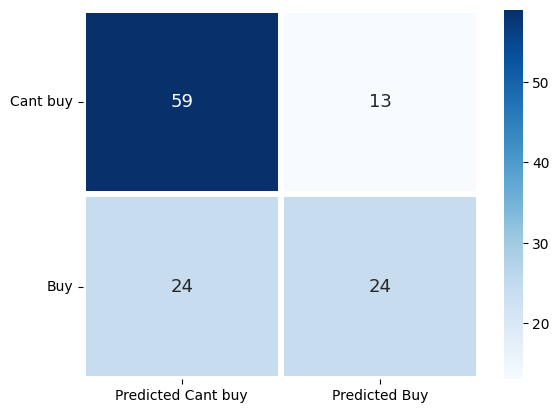

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 4,  annot_kws = {'fontsize': 13}, 
                yticklabels = ['Cant buy', 'Buy'], xticklabels = ['Predicted Cant buy', 'Predicted Buy'])
plt.yticks(rotation = 0)
plt.show()

**Random Forest Classifier**

In [22]:
# Load libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Split, Train and Test
from sklearn.model_selection import train_test_split
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)


# Create target vector indicating if class 0, otherwise 1
target = np.where((PredictClass == 0), 0, 1) #Dựa trên biến mục tiêu (lớp được dự đoán) PredictClass, tạo một vectơ mục tiêu chỉ định lớp 0 nếu giá trị là 0, ngược lại là 1.
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced") #Tạo một phiên bản của lớp RandomForestClassifier. 
                                                                                          #Tham số random_state được đặt là 0 để đảm bảo tính nhất quán của việc tạo các cây ngẫu nhiên, 
                                                                                          #n_jobs=-1 cho phép sử dụng tất cả các CPU có sẵn, 
                                                                                          #và class_weight="balanced" điều chỉnh trọng số lớp để cân bằng các lớp không đồng đều.

# Train model
model_2= randomforest.fit(X_train, y_train)

# Operation the output of RandomForest:
y_pred = model_2.predict(X_test)
# Test for accuracy
accuracy3 = model_2.score(X_test, y_test)
print(f"RandomForestClassifier Accuracy:{accuracy3*100}%")


RandomForestClassifier Accuracy:85.83333333333333%


<ipython-input-22-f8019d84cde2>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_2= randomforest.fit(X_train, y_train)


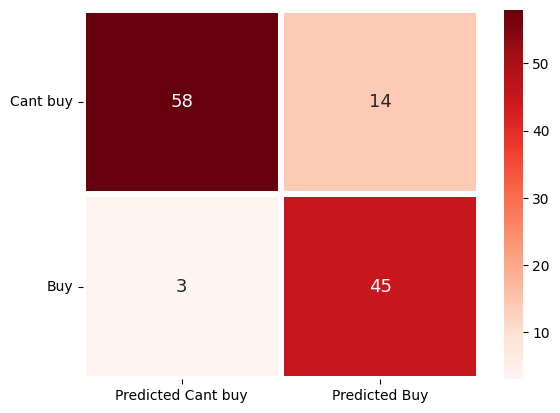

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 4,  annot_kws = {'fontsize': 13}, 
                yticklabels = ['Cant buy', 'Buy'], xticklabels = ['Predicted Cant buy', 'Predicted Buy'])
plt.yticks(rotation = 0)
plt.show()

**Since RandomForestClassifier gives low rating, change to Random Forests with Out-of-Bag Errors**

In [24]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Split, Train and Test
from sklearn.model_selection import train_test_split
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

# Create random tree classifier object
randomforest = RandomForestClassifier(random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)
# Train model
model_3 = randomforest.fit(X_test, y_test)
# View out-of-bag-error
accuracy4=randomforest.oob_score_
print(f"RandomForestClassifier Accuracy:{accuracy4*100}%")

<ipython-input-24-175ef88774bd>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3 = randomforest.fit(X_test, y_test)


RandomForestClassifier Accuracy:82.5%


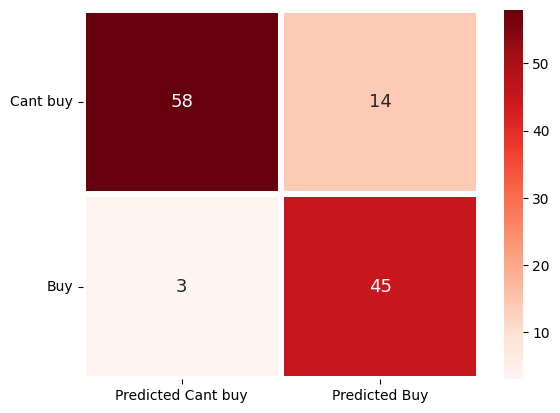

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 4,  annot_kws = {'fontsize': 13}, 
                yticklabels = ['Cant buy', 'Buy'], xticklabels = ['Predicted Cant buy', 'Predicted Buy'])
plt.yticks(rotation = 0)
plt.show()

In [26]:
#So sánh độ chính xác của 3 phương pháp
print(f"DecisionTreeClassifier Accuracy: {accuracy1*100}%")
print(f"BernoulliNB Accuracy:{accuracy2*100}%")
print(f"RandomForestClassifier Accuracy:{accuracy4*100}%")

DecisionTreeClassifier Accuracy: 81.66666666666667%
BernoulliNB Accuracy:69.16666666666667%
RandomForestClassifier Accuracy:82.5%


**Cross-validation**

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# Split, Train and Test
from sklearn.model_selection import train_test_split
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)


# Create standard scaler object
std_scaler = StandardScaler()

# Fit standard scaler to training set and transform features
train_std = std_scaler.fit_transform(X_train)
test_std = std_scaler.transform(X_test)

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline
pipeline = make_pipeline(std_scaler, logit)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Reshape the features and target
X = X.reshape((400, 3))
Y = Y.reshape((400,))

# Perform k-fold cross-validation
cv_results = cross_val_score(pipeline, X, Y, cv=kf, scoring="accuracy", n_jobs=-1)
#the mean values of the cross-validation results
acc=cv_results.mean()
# Print the cross-validation results
print(f"Cross-validation Accuracy:{acc*100}%")

Cross-validation Accuracy:85.25%


In [28]:
# Check for the size of the data
X.shape

(400, 3)

**K-Nearest Neighbors (K-NN)**

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split, Train and Test
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

# Standardize the data
STD = StandardScaler()
TrainStd = STD.fit_transform(X_train)
TestStd =  STD.fit_transform(X_test)

# Training the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
model_4 = knn.fit(TrainStd, y_train)

# Predicting with the KNN model:
y_pred = model_4.predict(test_std)

# Calculate and print the accuracy
accuracy5 = model_4.score(TestStd, y_test)
print(f"(KNN) Accuracy:{accuracy5*100}%")

(KNN) Accuracy:58.05555555555555%


**Using mean_squared_error (MSE) regression evaluation methods to measure the accuracy of the regression model.**

mean_squared_error là một độ đo thường được sử dụng để đánh giá mô hình hồi quy (regression). Nó tính toán sai số trung bình bình phương giữa các giá trị dự đoán và giá trị thực tế.

Công thức tính mean_squared_error như sau:

MSE = (1/n) * Σ(y_true - y_pred)²

Trong đó:

MSE: Mean Squared Error (Sai số trung bình bình phương)
n: Số lượng điểm dữ liệu trong tập kiểm tra
y_true: Mảng các giá trị thực tế
y_pred: Mảng các giá trị dự đoán
Giá trị MSE càng nhỏ, tức là mô hình dự đoán gần với giá trị thực tế. Đây là một độ đo đánh giá sự khác biệt giữa các giá trị dự đoán và giá trị thực tế. Các giá trị MSE sẽ luôn không âm và càng gần 0 thì mô hình càng tốt.

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Split, Train and Test
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Standardize the data
scaler = StandardScaler()
train_std = scaler.fit_transform(X_train)
test_std = scaler.transform(X_test)

# Training the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
model = knn.fit(train_std, y_train)

# Predicting with the KNN model
y_pred = model.predict(test_std)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


MSE: 0.11400000000000002


**Gradient Boosting Regressor**

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split, Train and Test
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

# Standardize the data

STD = StandardScaler()
TrainStd = STD.fit_transform(X_train)
TestStd =  STD.fit_transform(X_test)

#  Training the GradientBoostingRegressor model
gb = GradientBoostingRegressor(random_state=0)
model_5 = gb.fit(TrainStd, y_train)

# Predicting with the GradientBoostingRegressor model:
Target = model_5.predict(TestStd)

# Calculate and print the accuracy
accuracy6 = model_5.score(TestStd, y_test)
print(f"GradientBoostingRegressor Accuracy:{accuracy6*100}%")

GradientBoostingRegressor Accuracy:45.46918569790888%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**MSE**

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Split, Train and Test
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Standardize the data
scaler = StandardScaler()
train_std = scaler.fit_transform(X_train)
test_std = scaler.transform(X_test)

# Training the KNN model
gb = GradientBoostingRegressor(random_state=0)
model_5 = gb.fit(TrainStd, y_train)

# Predicting with the KNN model
y_pred = model_5.predict(test_std)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


MSE: 0.13301373074815895


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**AdaBoost Regressor**

In [33]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split, Train and Test
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

# Standardize the data
STD = StandardScaler()
TrainStd = STD.fit_transform(X_train)
TestStd =  STD.fit_transform(X_test)

# Training the AdaBoostRegressor model
adaboost = AdaBoostRegressor(random_state=0)
model_6 = adaboost.fit(TrainStd, y_train)

# Predicting with the AdaBoostRegressor model
Target = model_6.predict(TestStd)

# Calculate and print the accuracy
accuracy7 = model_6.score(TestStd, y_test)
print(f"AdaBoostRegressor Accuracy:{accuracy7*100}%")

AdaBoostRegressor Accuracy:53.53116974320036%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**MSE**

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Split, Train and Test
X = dataframe[Features].values
Y = dataframe[PredictClass].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Standardize the data
scaler = StandardScaler()
train_std = scaler.fit_transform(X_train)
test_std = scaler.transform(X_test)

# Training the KNN model
adaboost = AdaBoostRegressor(random_state=0)
model_6 = adaboost.fit(TrainStd, y_train)

# Predicting with the KNN model
y_pred = model_6.predict(test_std)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


MSE: 0.09769587647900475


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
#So sánh độ chính xác
print(f"DecisionTreeClassifier Accuracy: {accuracy1*100}%")
print(f"BernoulliNB Accuracy:{accuracy2*100}%")
print(f"RandomForestClassifier Accuracy:{accuracy3*100}%")
print(f"RandomForestClassifier Accuracy:{accuracy4*100}%")
print(f"Cross-validation Accuracy:{acc*100}%")
print(f"(KNN) Accuracy:{accuracy5*100}%")
print(f"GradientBoostingRegressor Accuracy:{accuracy6*100}%")
print(f"AdaBoostRegressor Accuracy:{accuracy7*100}%")

DecisionTreeClassifier Accuracy: 81.66666666666667%
BernoulliNB Accuracy:69.16666666666667%
RandomForestClassifier Accuracy:85.83333333333333%
RandomForestClassifier Accuracy:82.5%
Cross-validation Accuracy:85.25%
(KNN) Accuracy:58.05555555555555%
GradientBoostingRegressor Accuracy:45.46918569790888%
AdaBoostRegressor Accuracy:53.53116974320036%
